<a href="https://colab.research.google.com/github/jongchurlwon/github_test/blob/main/woncodeing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyupbit

     |████████████████████████████████| 103 kB 9.8 MB/s 


In [2]:
import pyupbit

In [3]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-ETH", interval="minute60")
df

,open,high,low,close,volume,value
2021-07-28 02:00:00,2582000.0,2591000.0,2570000.0,2585000.0,1561.834801,4.030947e+09
2021-07-28 03:00:00,2586000.0,2604000.0,2561000.0,2596000.0,1408.019744,3.632457e+09
2021-07-28 04:00:00,2596000.0,2601000.0,2580000.0,2581000.0,995.358484,2.580216e+09
2021-07-28 05:00:00,2581000.0,2609000.0,2580000.0,2600000.0,1139.326660,2.959686e+09
2021-07-28 06:00:00,2600000.0,2632000.0,2598000.0,2620000.0,1996.473906,5.224986e+09
...,...,...,...,...,...,...
2021-08-05 05:00:00,3103000.0,3130000.0,3098000.0,3122000.0,3748.355226,1.169027e+10
2021-08-05 06:00:00,3122000.0,3135000.0,3103000.0,3122000.0,6465.170334,2.015290e+10
2021-08-05 07:00:00,3122000.0,3176000.0,3109000.0,3137000.0,11719.929675,3.684993e+10
2021-08-05 08:00:00,3138000.0,3156000.0,3113000.0,3136000.0,6818.209453,2.137374e+10


In [4]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2021-07-28 02:00:00,2585000.0
1,2021-07-28 03:00:00,2596000.0
2,2021-07-28 04:00:00,2581000.0
3,2021-07-28 05:00:00,2600000.0
4,2021-07-28 06:00:00,2620000.0
...,...,...
195,2021-08-05 05:00:00,3122000.0
196,2021-08-05 06:00:00,3122000.0
197,2021-08-05 07:00:00,3137000.0
198,2021-08-05 08:00:00,3136000.0


In [5]:
#prophet 불러옴
from fbprophet import Prophet

In [6]:
#학습
model = Prophet()
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [7]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

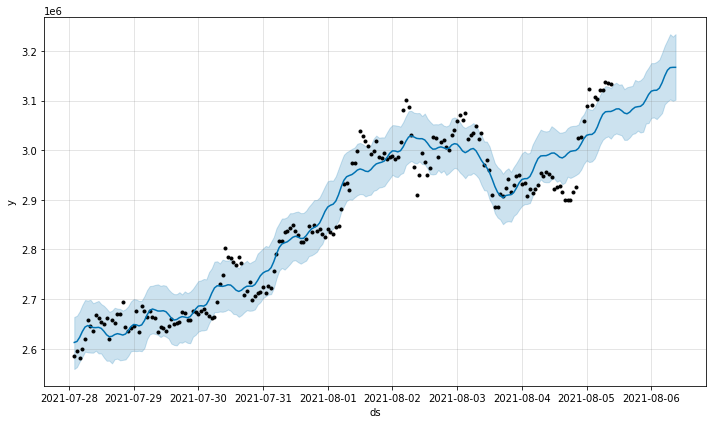

In [8]:
#그래프1
fig1 = model.plot(forecast)

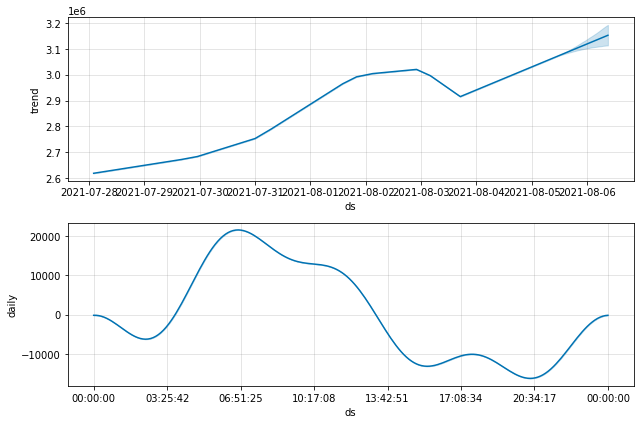

In [9]:
#그래프2
fig2 = model.plot_components(forecast)

In [10]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-ETH")
nowValue

3140000.0

In [11]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨋든 당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

3166945.9675114327

In [12]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  3140000.0
종가의 가격:  3166945.9675114327


In [13]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-28 02:00:00,2.618383e+06,2.559034e+06,2.663984e+06,2.618383e+06,2.618383e+06,-5718.005571,-5718.005571,-5718.005571,-5718.005571,-5718.005571,-5718.005571,0.0,0.0,0.0,2.612665e+06
1,2021-07-28 03:00:00,2.619773e+06,2.563079e+06,2.666432e+06,2.619773e+06,2.619773e+06,-5151.018801,-5151.018801,-5151.018801,-5151.018801,-5151.018801,-5151.018801,0.0,0.0,0.0,2.614622e+06
2,2021-07-28 04:00:00,2.621163e+06,2.573948e+06,2.675178e+06,2.621163e+06,2.621163e+06,1835.324529,1835.324529,1835.324529,1835.324529,1835.324529,1835.324529,0.0,0.0,0.0,2.622998e+06
3,2021-07-28 05:00:00,2.622553e+06,2.583480e+06,2.688044e+06,2.622553e+06,2.622553e+06,12106.889936,12106.889936,12106.889936,12106.889936,12106.889936,12106.889936,0.0,0.0,0.0,2.634660e+06
4,2021-07-28 06:00:00,2.623943e+06,2.594246e+06,2.698094e+06,2.623943e+06,2.623943e+06,19786.938128,19786.938128,19786.938128,19786.938128,19786.938128,19786.938128,0.0,0.0,0.0,2.643730e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2021-08-06 05:00:00,3.137580e+06,3.092452e+06,3.210523e+06,3.109153e+06,3.167209e+06,12106.889936,12106.889936,12106.889936,12106.889936,12106.889936,12106.889936,0.0,0.0,0.0,3.149687e+06
220,2021-08-06 06:00:00,3.141288e+06,3.098062e+06,3.221832e+06,3.110099e+06,3.173931e+06,19786.938128,19786.938128,19786.938128,19786.938128,19786.938128,19786.938128,0.0,0.0,0.0,3.161074e+06
221,2021-08-06 07:00:00,3.144995e+06,3.102370e+06,3.233642e+06,3.111717e+06,3.180776e+06,21336.114395,21336.114395,21336.114395,21336.114395,21336.114395,21336.114395,0.0,0.0,0.0,3.166331e+06
222,2021-08-06 08:00:00,3.148703e+06,3.099411e+06,3.228797e+06,3.112607e+06,3.187150e+06,18170.158452,18170.158452,18170.158452,18170.158452,18170.158452,18170.158452,0.0,0.0,0.0,3.166873e+06
